<a href="https://colab.research.google.com/github/limatwo/Analysis-of-vehicle-data/blob/main/ml_task_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import sys
import pandas as pd
import seaborn as sns
import inspect
import matplotlib.pyplot as plt
import copy # علشان اعرف انسخ
from sklearn.model_selection import train_test_split  # فيها كل حلجة لل ماشين ليرني
from sklearn.linear_model import LinearRegression
import seaborn as sns

from sklearn.metrics import mean_absolute_error, median_absolute_error, r2_score, mean_squared_error

In [3]:
data = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')
df = copy.deepcopy(data)
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
df['transmission'].value_counts()
#df['CAR\ DETAILS\ FROM\ CAR\ DEKHO.csv'].unique

Manual       3892
Automatic     448
Name: transmission, dtype: int64

In [5]:
#checking for duplicates
duplicate_rows = df[df.duplicated()]
duplicate_rows.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
13,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
14,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
15,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
16,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
17,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [6]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


## **Analysis of the summary statistics**



---


1.   The data in the .csv file covers the range of years from 1992 to 2020
2.   the majorty of vehicle models are in the years of 2011 to 2016 which is recent
3. the average selling price is 504,127 but the min selling was 20k and the max was 8.9M which is wide varion
4. Average km driven is 66000 km. MIn is 1km and max is 800k km






In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [8]:
num_rows = len(df.index)
num_rows

4340

In [9]:
num_duplicate_rows = len(df) - len(df.drop_duplicates())
num_duplicate_rows

763

In [10]:
df.isna()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
4335,False,False,False,False,False,False,False,False
4336,False,False,False,False,False,False,False,False
4337,False,False,False,False,False,False,False,False
4338,False,False,False,False,False,False,False,False


In [11]:
df['name'].nunique()

1491

In [12]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [13]:
#df_state=pd.get_dummies(df['State'],drop_first=True)
#df.keys()

df = df.groupby('name').filter(lambda x: len(x) > 3)
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [14]:
df_state = pd.get_dummies(df[['name','owner', 'transmission', 'seller_type','fuel']], drop_first=True)

df_state.head()

,name_Audi A6 2.0 TDI Premium Plus,name_Audi Q3 2.0 TDI Quattro Premium Plus,name_BMW 5 Series 520d Luxury Line,name_BMW 7 Series 730Ld,name_BMW X1 sDrive 20d xLine,name_BMW X5 xDrive 30d xLine,name_Chevrolet Aveo U-VA 1.2 LS,name_Chevrolet Beat Diesel,name_Chevrolet Beat Diesel LS,name_Chevrolet Beat Diesel LT,...,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,transmission_Manual,seller_type_Individual,seller_type_Trustmark Dealer,fuel_Diesel,fuel_LPG,fuel_Petrol
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,1,0,0


In [15]:
df_state.columns

Index(['name_Audi A6 2.0 TDI Premium Plus',
       'name_Audi Q3 2.0 TDI Quattro Premium Plus',
       'name_BMW 5 Series 520d Luxury Line', 'name_BMW 7 Series 730Ld',
       'name_BMW X1 sDrive 20d xLine', 'name_BMW X5 xDrive 30d xLine',
       'name_Chevrolet Aveo U-VA 1.2 LS', 'name_Chevrolet Beat Diesel',
       'name_Chevrolet Beat Diesel LS', 'name_Chevrolet Beat Diesel LT',
       ...
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner', 'transmission_Manual',
       'seller_type_Individual', 'seller_type_Trustmark Dealer', 'fuel_Diesel',
       'fuel_LPG', 'fuel_Petrol'],
      dtype='object', length=313)

In [16]:
#new_df= pd.concat([df, df_state1,df_state2,df_state4,df_state5,df_state6], axis =1)

new_df= pd.concat([df, df_state], axis =1)


new_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,name_Audi A6 2.0 TDI Premium Plus,name_Audi Q3 2.0 TDI Quattro Premium Plus,...,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,transmission_Manual,seller_type_Individual,seller_type_Trustmark Dealer,fuel_Diesel,fuel_LPG,fuel_Petrol
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,0,0,...,0,0,0,0,1,1,0,0,0,1
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,0,0,...,0,0,0,0,1,1,0,0,0,1
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,0,0,...,0,0,0,0,1,1,0,1,0,0
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,0,0,...,0,0,0,0,1,1,0,0,0,1
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,0,0,...,0,1,0,0,1,1,0,1,0,0


In [17]:
new_df=new_df.drop(['name','owner', 'transmission', 'seller_type','fuel'], axis = 1) # التخلص من العامود للولايه
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2488 entries, 0 to 4339
Columns: 316 entries, year to fuel_Petrol
dtypes: int64(3), uint8(313)
memory usage: 838.2 KB


In [18]:
new_df.head(10)

,year,selling_price,km_driven,name_Audi A6 2.0 TDI Premium Plus,name_Audi Q3 2.0 TDI Quattro Premium Plus,name_BMW 5 Series 520d Luxury Line,name_BMW 7 Series 730Ld,name_BMW X1 sDrive 20d xLine,name_BMW X5 xDrive 30d xLine,name_Chevrolet Aveo U-VA 1.2 LS,...,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,transmission_Manual,seller_type_Individual,seller_type_Trustmark Dealer,fuel_Diesel,fuel_LPG,fuel_Petrol
0,2007,60000,70000,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1
1,2007,135000,50000,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1
2,2012,600000,100000,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,1,0,0
3,2017,250000,46000,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1
4,2014,450000,141000,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,1,0,0
5,2007,140000,125000,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1
6,2016,550000,25000,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1
7,2014,240000,60000,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,1
8,2015,850000,25000,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1
10,2015,260000,35000,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1


In [19]:
x = new_df.drop ('selling_price', axis=1)# تخلص من عامود الربح حتي يضع الباقي في ال ايكس
y = new_df['selling_price']
y

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4333    225000
4335    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 2488, dtype: int64

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.3, random_state=42) # يعني قسم الخبطه ٤٢ وده رقم سري    نا السبلت حصل
x_train
x_test

,year,km_driven,name_Audi A6 2.0 TDI Premium Plus,name_Audi Q3 2.0 TDI Quattro Premium Plus,name_BMW 5 Series 520d Luxury Line,name_BMW 7 Series 730Ld,name_BMW X1 sDrive 20d xLine,name_BMW X5 xDrive 30d xLine,name_Chevrolet Aveo U-VA 1.2 LS,name_Chevrolet Beat Diesel,...,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,transmission_Manual,seller_type_Individual,seller_type_Trustmark Dealer,fuel_Diesel,fuel_LPG,fuel_Petrol
1755,2013,45264,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2239,2019,30000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3638,2013,110000,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,1,0,0
3416,2014,99000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2854,2009,80000,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2087,2014,48000,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1
202,2015,50000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1578,2015,70000,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,0,1,0,0
1199,2014,107143,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,1,0,0


In [21]:
new_df.columns

Index(['year', 'selling_price', 'km_driven',
       'name_Audi A6 2.0 TDI Premium Plus',
       'name_Audi Q3 2.0 TDI Quattro Premium Plus',
       'name_BMW 5 Series 520d Luxury Line', 'name_BMW 7 Series 730Ld',
       'name_BMW X1 sDrive 20d xLine', 'name_BMW X5 xDrive 30d xLine',
       'name_Chevrolet Aveo U-VA 1.2 LS',
       ...
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner', 'transmission_Manual',
       'seller_type_Individual', 'seller_type_Trustmark Dealer', 'fuel_Diesel',
       'fuel_LPG', 'fuel_Petrol'],
      dtype='object', length=316)

In [22]:
model = LinearRegression()

model.fit(x_train , y_train) # هنا دربت المودل

LinearRegression()

In [23]:
from sklearn.metrics import mean_absolute_error, median_absolute_error, r2_score

**Prediction**


In [24]:
y_pred=model.predict(x_test)
y_test
#y_pred

1755     580000
2239    4950000
3638     220000
3416    1800000
2854     254999
         ...   
2087     400000
202      650000
1578     450000
1199     200000
3429     545000
Name: selling_price, Length: 747, dtype: int64

In [25]:
r2_score(y_test , y_pred)

0.9104585029372236

In [26]:
m=model.coef_
b = model.intercept_
#np.set_printoptions(threshold=sys.maxsize)
#print(m)

# **Analysis of Linear Regression**

---



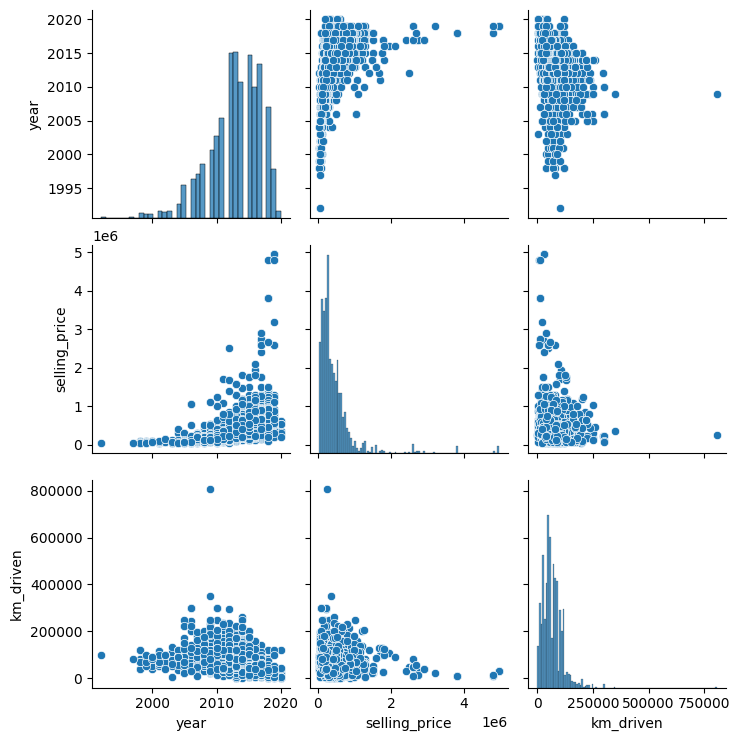

In [27]:
sns.pairplot(df)





*   In the histogram of year vs year most cars were made betweeon 2010 and 2020
*   In the selling_price vs year cars in the 2010 to 2020 have a higher selling price.


*   In km_driven vs selling_price a car with less kilometers on the odometer has a higher value indicating less use of the vehicle and so higher selling price.
*  Km_driven vs Km_driven  most vehicles are between 0 and 250k





<ipython-input-28-41b1c1045f29>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

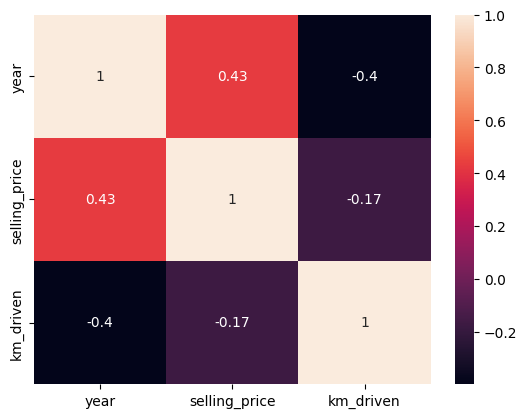

In [28]:
#plt.scatter(x_test, y_test, color = 'blue')
#plt.plot(x_test, y_pred, color='green')
sns.heatmap(df.corr(), annot=True)


1.   year and selling price have a +ve corr of 0.43 which is  moderate. we can infer that newer cars tend to have higher selling prices.
2.   km driven and year has a -ve corr of 0.4 which is still a moderate correlation. the negative correlation means that the more the car was driven the older the year and that applies to a lower selling price.
3. km driven  and selling price has weak -ve corr .

<ipython-input-30-ea1a7bf6e32c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['year'])


<Axes: xlabel='year', ylabel='Density'>

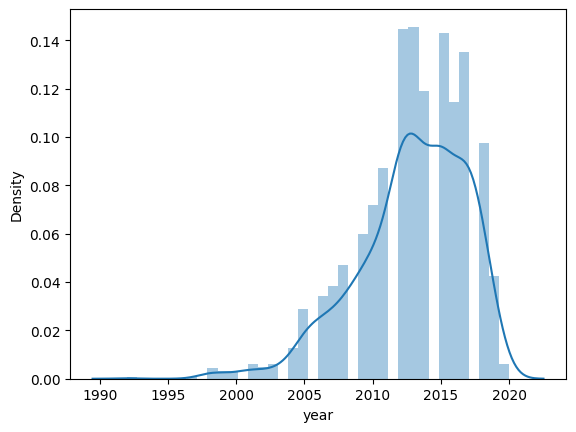

In [30]:
sns.distplot(df['year'])

The year is skewed to the left

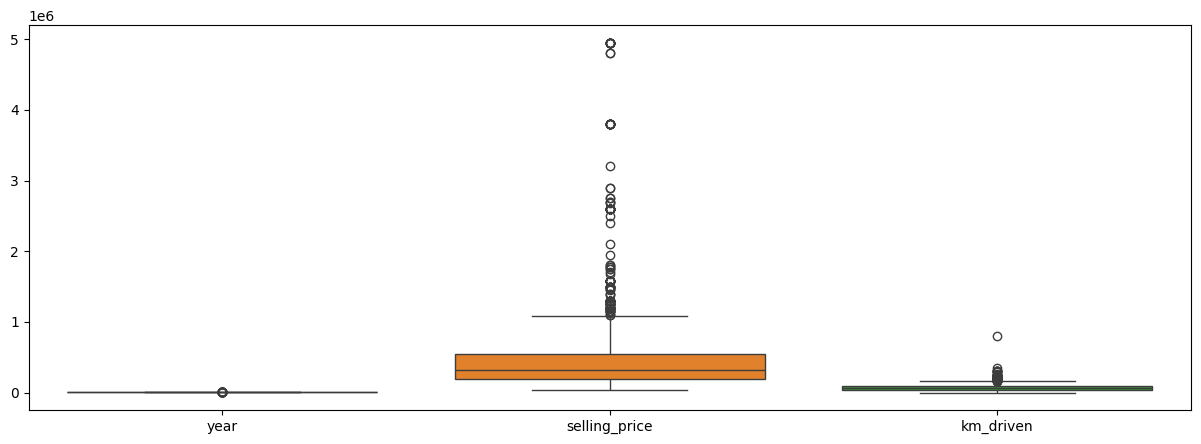

In [31]:
plt.figure(figsize = (15,5))
sns.boxplot(data=df)
plt.show()




In the selling price we have outliers




# ***Polynomial Linear regression***






---



In [ ]:
from sklearn.preprocessing import PolynomialFeatures

p_model=PolynomialFeatures(degree = 2)
x_poly=p_model.fit_transform(x)
#y_poly=p_model.fit_transform(y)
# x_poly


model = LinearRegression()
model.fit (x_poly , y)

In [ ]:
y_pred = model.predict(x_poly)

In [ ]:
r_squared = model.score(x_poly, y)
r_squared

In [ ]:
# y_pred = model.predict(x_poly)
# plt.scatter(x.iloc[:, 0], y, color='r')
# #plt.scatter(x, y , color = 'r')
# plt.plot (x, y_pred, color ='b')



import matplotlib.pyplot as plt

# Assuming you have already defined x, y, and y_pred
# x = your feature data (DataFrame)
# y = your target data (Series)
# y_pred = your predicted values (array)

# Extract the first feature column (change the index if needed)
km_driven = x.iloc[:, 0]
feature_column=km_driven
# Create the scatter plot
plt.scatter(feature_column, y, color='r', label='Actual Data')
plt.plot(feature_column, y_pred, color='b', label='Regression Line')
plt.xlabel('Feature X')
plt.ylabel('Target Y')
plt.title('Scatter Plot with Regression Line')
plt.legend()
plt.show()


In [ ]:
residuals = y - y_pred
plt.scatter(x.iloc[:, 0], residuals, color='g')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Feature X')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


In [ ]:
sns.pairplot(df)